In [1]:
import os
import glob
import re
import matplotlib.pyplot as plt
import numpy as np

import librosa
import librosa.display

import IPython.display as ipd

# __Get data__ &#11088;

In [2]:
# check path and count # of file in specify directory
# inputPath = "C:/Users/jeant/OneDrive - Chulalongkorn University/Desktop/Senior Project/Dataset/Human voice(wav.)/"
# inputPath = "C:/Users/jeant/OneDrive - Chulalongkorn University/Desktop/Senior Project/Convertor code/mock data/"
# inputPath = "C:/Users/jeant/OneDrive - Chulalongkorn University/Desktop/Senior Project/Convertor code/"
# inputPath = "C:/Users/jeant/OneDrive - Chulalongkorn University/Desktop/Senior Project/Convertor code/Test/"

inputPath = "C:/Users/jeant/OneDrive - Chulalongkorn University/Desktop/Senior Project/Dataset/Wav voice (16000)/Bright.wav (trimmed)/"


if os.path.exists(inputPath):
    print(f"The directory '{inputPath}' exists.")
else:
    print(f"The directory '{inputPath}' does not exist.")

audioClips = [os.path.basename(x) for x in glob.glob(os.path.join(inputPath, "*.wav"))]

print("Number of .wav files in audio folder = ", len(audioClips))

The directory 'C:/Users/jeant/OneDrive - Chulalongkorn University/Desktop/Senior Project/Dataset/Wav voice (16000)/Bright.wav (trimmed)/' exists.
Number of .wav files in audio folder =  50


In [3]:
def sortFileName(filename):
    return [int(s) if s.isdigit() else s for s in re.split(r"(\d+)", filename)]


audioClips = sorted(audioClips, key=sortFileName)
print(audioClips)

['Bright 1.wav', 'Bright 2.wav', 'Bright 3.wav', 'Bright 4.wav', 'Bright 5.wav', 'Bright 6.wav', 'Bright 7.wav', 'Bright 8.wav', 'Bright 9.wav', 'Bright 10.wav', 'Bright 11.wav', 'Bright 12.wav', 'Bright 13.wav', 'Bright 14.wav', 'Bright 15.wav', 'Bright 16.wav', 'Bright 17.wav', 'Bright 18.wav', 'Bright 19.wav', 'Bright 20.wav', 'Bright 21.wav', 'Bright 22.wav', 'Bright 23.wav', 'Bright 24.wav', 'Bright 25.wav', 'Bright 26.wav', 'Bright 27.wav', 'Bright 28.wav', 'Bright 29.wav', 'Bright 30.wav', 'Bright 31.wav', 'Bright 32.wav', 'Bright 33.wav', 'Bright 34.wav', 'Bright 35.wav', 'Bright 36.wav', 'Bright 37.wav', 'Bright 38.wav', 'Bright 39.wav', 'Bright 40.wav', 'Bright 41.wav', 'Bright 42.wav', 'Bright 43.wav', 'Bright 44.wav', 'Bright 45.wav', 'Bright 46.wav', 'Bright 47.wav', 'Bright 48.wav', 'Bright 49.wav', 'Bright 50.wav']


# __Generating Spectrogram__ &#11088;

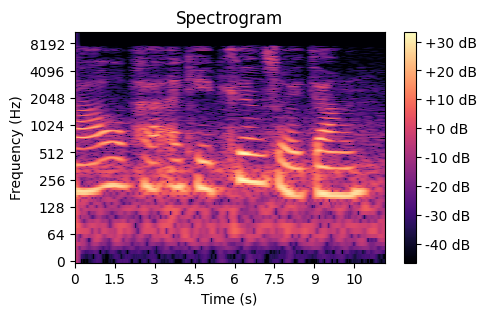

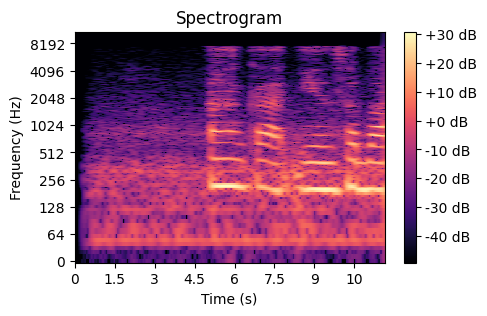

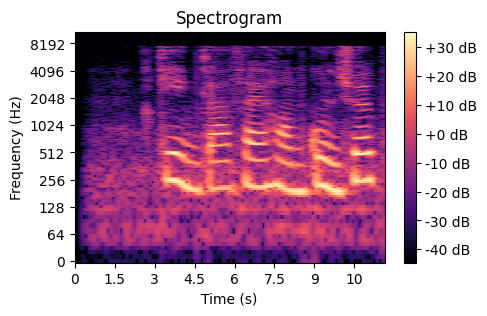

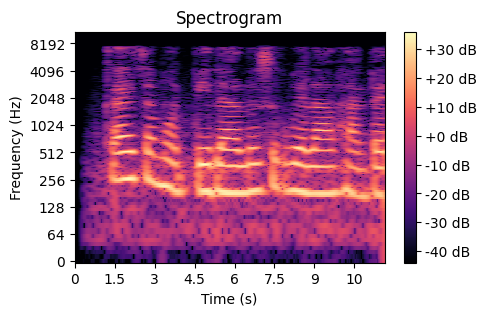

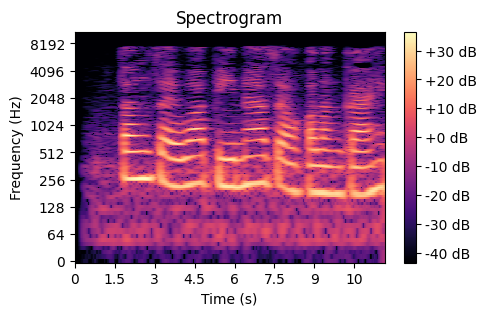

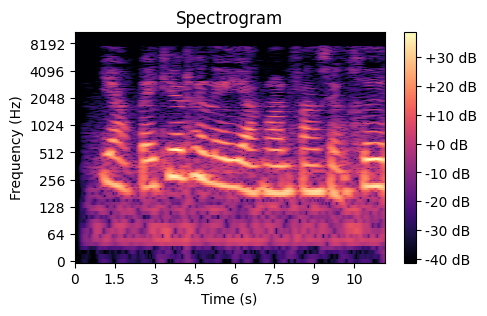

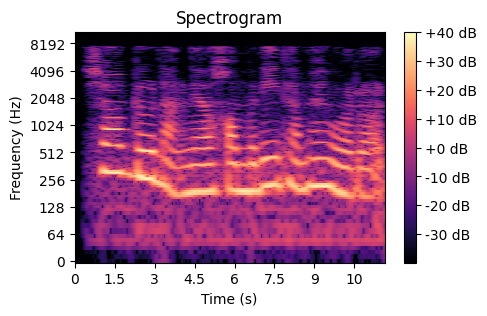

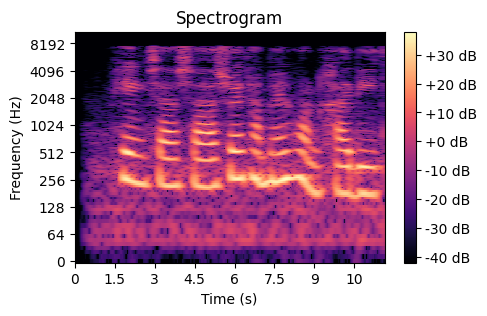

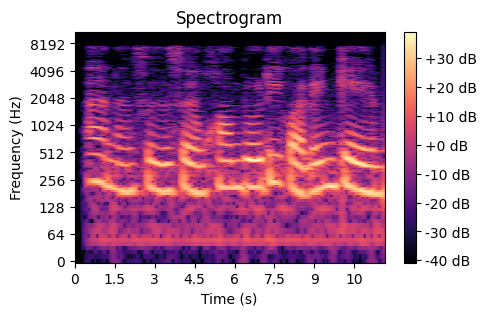

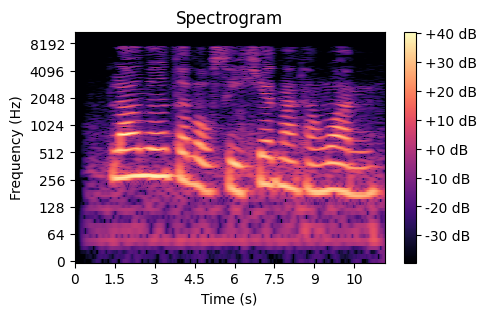

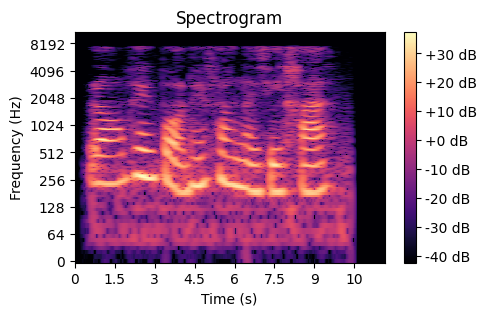

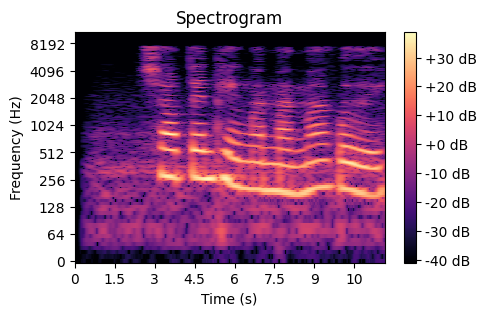

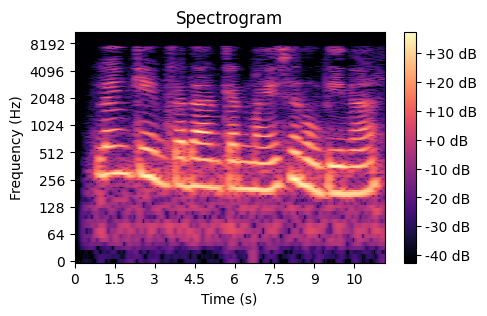

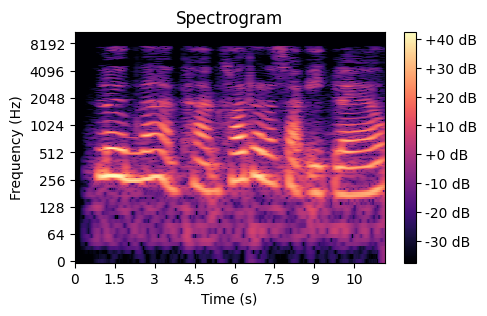

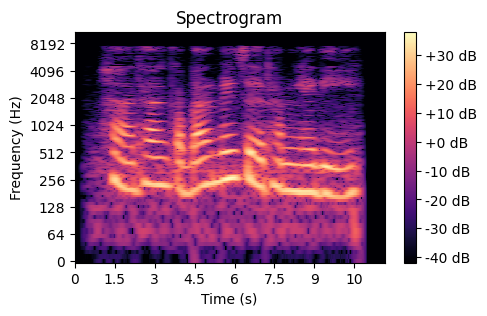

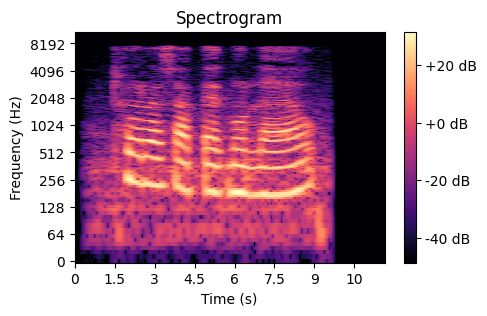

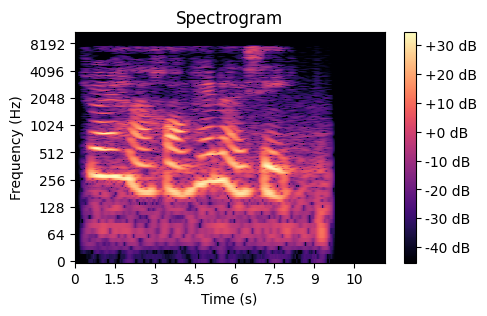

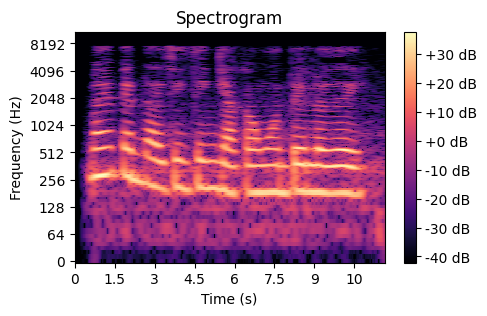

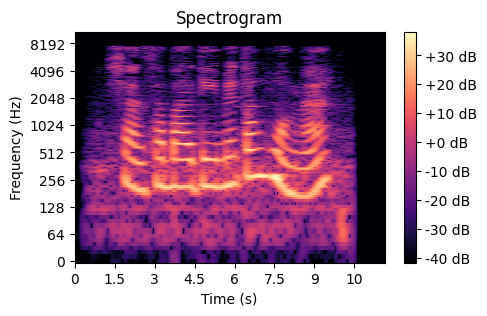

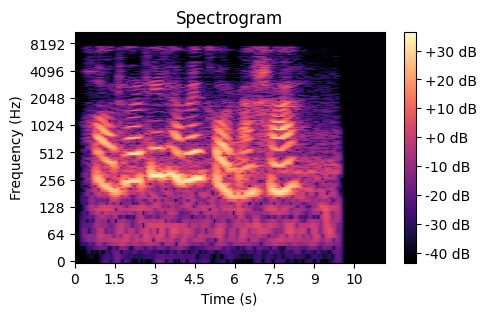

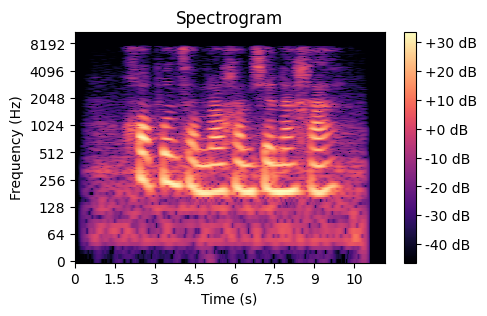

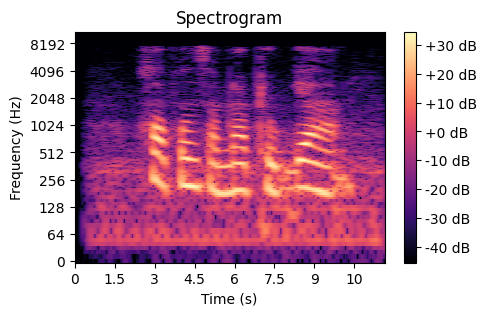

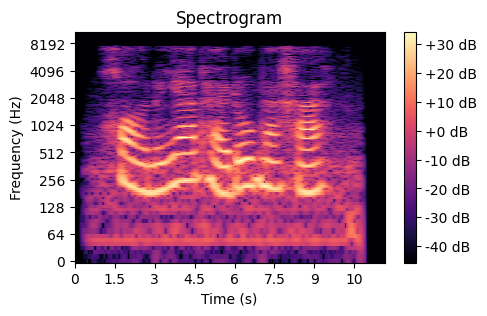

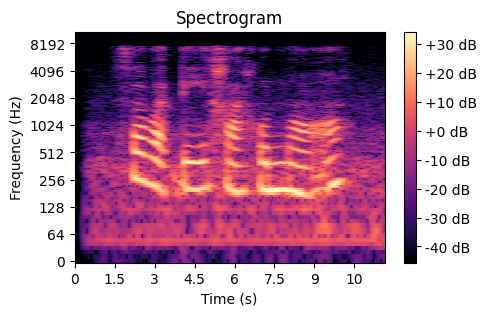

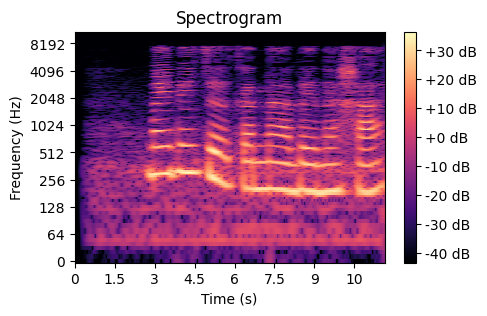

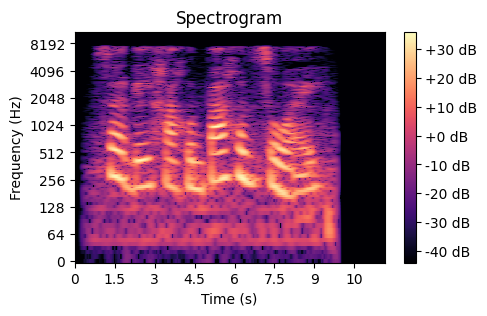

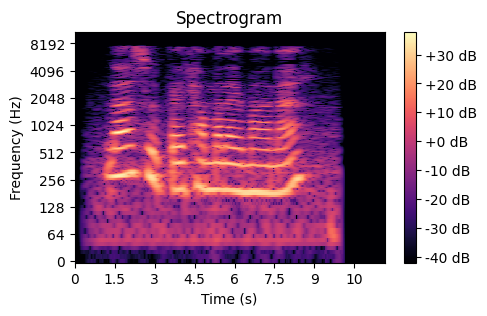

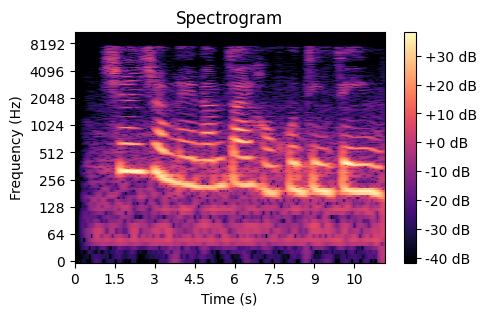

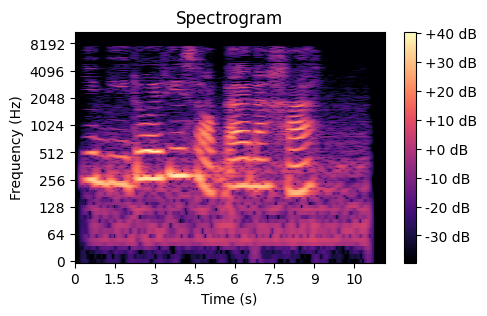

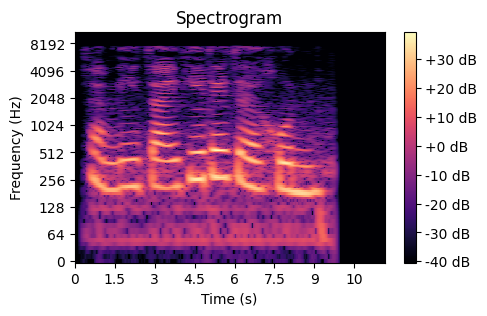

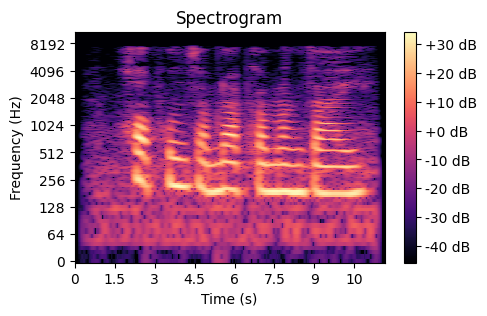

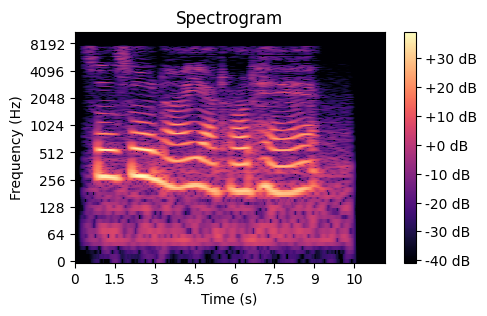

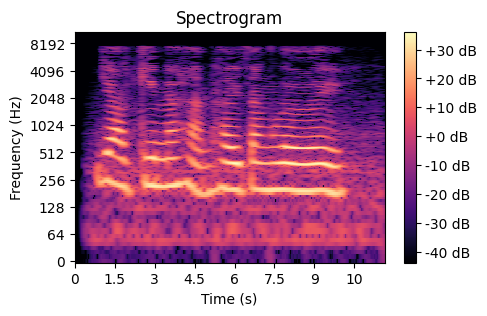

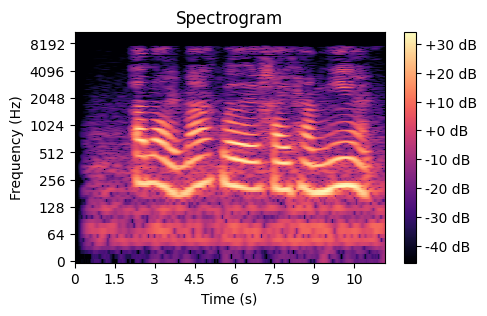

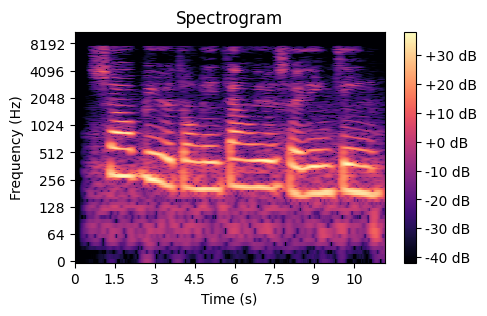

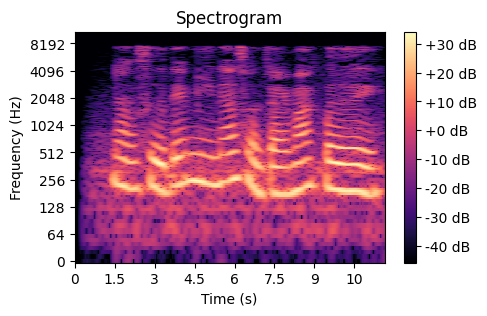

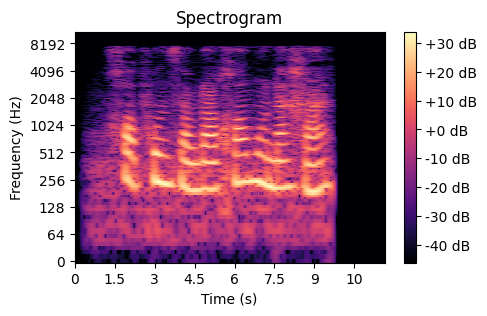

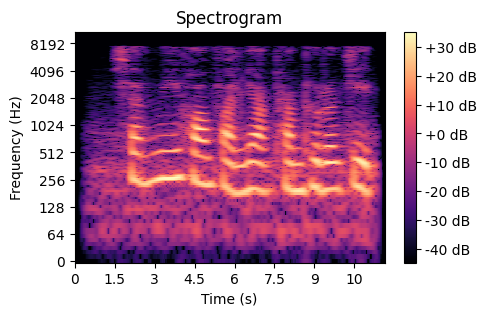

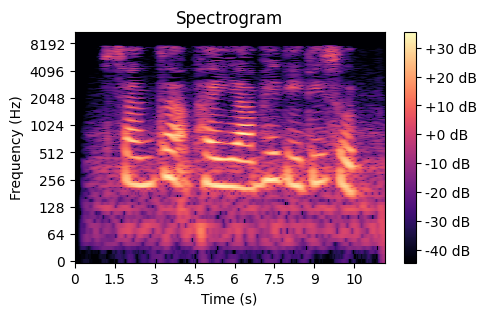

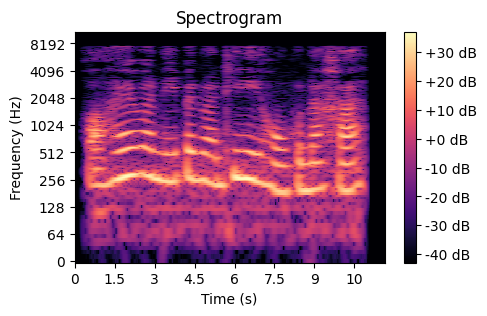

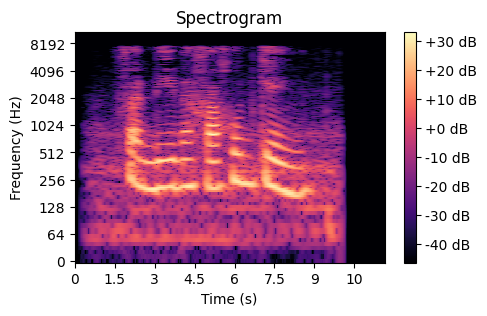

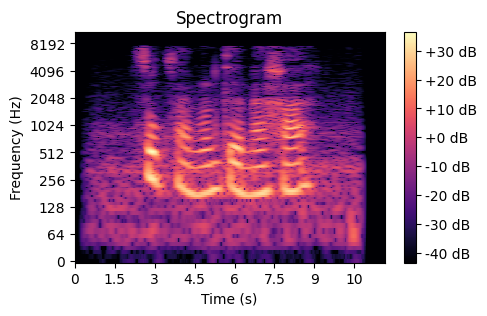

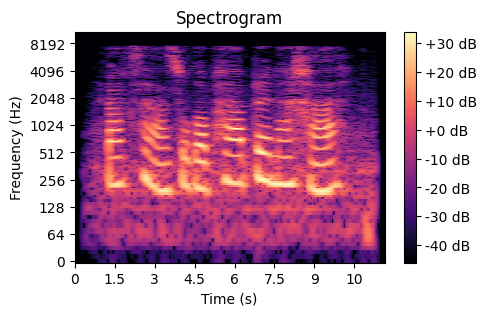

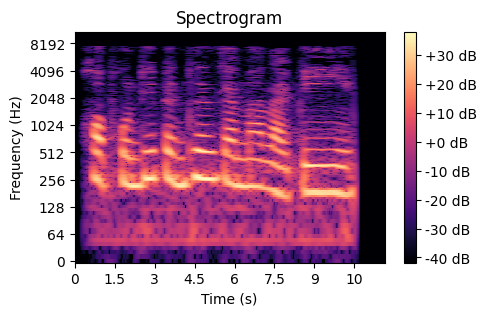

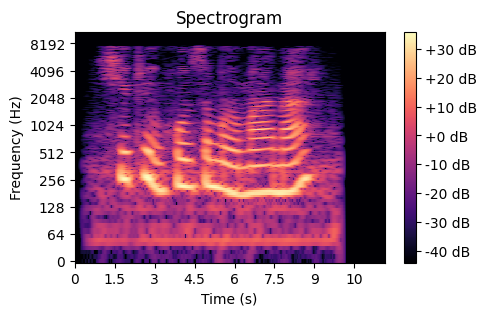

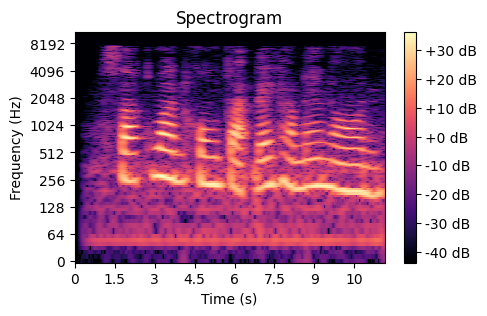

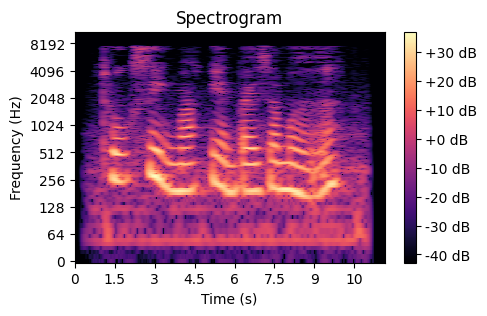

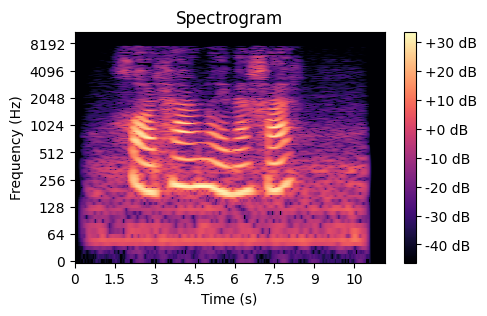

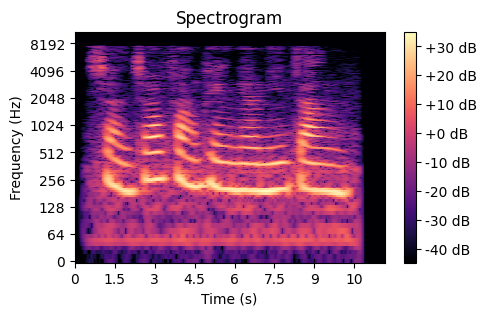

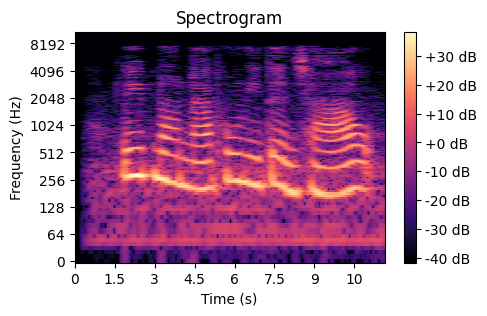

In [6]:
for i in range(len(audioClips)):
    if len(audioClips) > 0:
        audioPath = os.path.join(inputPath, audioClips[i])
        x, sr = librosa.load(audioPath)

        ########## Wave plot
        # plt.figure(figsize=(14, 5))
        # librosa.display.waveshow(x, sr=sr)
        # plt.title("Waveform")
        # plt.xlabel("Time (s)")
        # plt.ylabel("Amplitude")

        # actualName = audioClips[i][:-4]
        # wavePlotPic = actualName + ".png"
        # plt.savefig(wavePlotPic)

        # plt.show()

        hop_length = 128 # smaller values for higher resolution
        n_fft = 8192 # larger values for higher resolution

        hop_length = int(len(x) / 500)
        n_fft = int(len(x) / 20)

        bins_per_octave = 24  # Increase this value for higher definition
        n_bins = 24 * bins_per_octave  # You can adjust this value based on your preference

        # threshold_factor = 1e-100
        #threshold_percentage = 60
        # minimum_threshold = 0.00000000001

        #X = librosa.stft(x)
        X = librosa.stft(x, hop_length = hop_length, n_fft = n_fft)
        Xdb = librosa.amplitude_to_db(abs(X))

        # Adaptive thresholding

        #threshold = np.max(Xdb) * threshold_factor # Threshold Factor
        #threshold = np.percentile(Xdb, threshold_percentage) # Relative Threshold
        #threshold = max(np.max(Xdb) * threshold_factor, minimum_threshold) # Minimum Threshold

        #Xdb_sparse = np.where(Xdb > threshold, Xdb, np.min(Xdb))

        plt.figure(figsize=(5, 3))

        chromagram = librosa.feature.chroma_stft(y=x, sr=sr, hop_length=hop_length, n_fft=n_fft)

        librosa.display.specshow(
            #Xdb_sparse, sr=sr, x_axis="time", y_axis="log", cmap="magma"
            Xdb, sr=sr, x_axis="time", y_axis="log", cmap="magma" # viridis
        )
        # librosa.display.specshow(
        #     Xdb, sr=sr, x_axis="time", y_axis="hz", cmap="viridis", bins_per_octave = bins_per_octave, n_bins = n_bins
        # )
        plt.colorbar(format="%+2.0f dB")
        plt.title("Spectrogram")
        plt.xlabel("Time (s)")
        plt.ylabel("Frequency (Hz)")

        # Display the spectrogram plot
        plt.show()

    else:
        print("No audio clips found in the directory.")

In [ ]:
for i in range(len(audioClips)):
    if len(audioClips) > 0:
        audioPath = os.path.join(inputPath, audioClips[i])
        x, sr = librosa.load(audioPath)

        hop_length = 128 # smaller values for higher resolution
        n_fft = 8192 # larger values for higher resolution

        # hop_length = int(len(x) / 500)
        # n_fft = int(len(x) / 20)

        bins_per_octave = 24  # Increase this value for higher definition
        n_bins = 24 * bins_per_octave  # You can adjust this value based on your preference

        X = librosa.stft(x, hop_length = hop_length, n_fft = n_fft)
        Xdb = librosa.amplitude_to_db(abs(X))

        plt.figure(figsize=(5, 3))

        chromagram = librosa.feature.chroma_stft(y=x, sr=sr, hop_length=hop_length, n_fft=n_fft)

        librosa.display.specshow(
            Xdb, sr=sr, x_axis="time", y_axis="log", cmap="magma" # viridis
        )
        plt.colorbar(format="%+2.0f dB")
        plt.title("Spectrogram")
        plt.xlabel("Time (s)")
        plt.ylabel("Frequency (Hz)")
        plt.show()

    else:
        print("No audio clips found in the directory.")

AttributeError: 'QuadMesh' object has no property 'x_min'

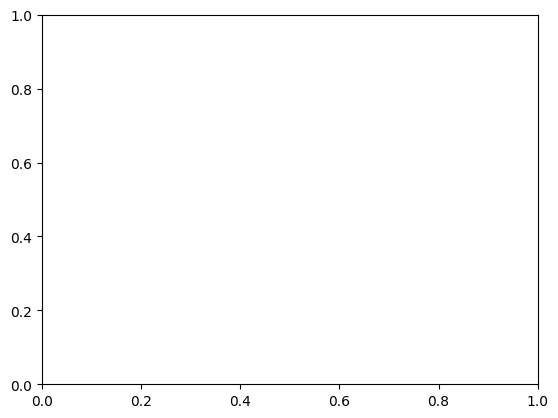

In [6]:
for i in range(len(audioClips)):
    if len(audioClips) > 0:
        audioPath = os.path.join(inputPath, audioClips[i])
        x, sr = librosa.load(audioPath)

        # Adjust parameters for a 10-second time axis:
        hop_length = 256  # Increased for smoother time resolution
        n_fft = 4096  # Maintained for frequency resolution

        # ... (rest of your code remains the same)

        # Plotting with specified time axis range:
        librosa.display.specshow(
            Xdb, sr=sr, x_axis="time", y_axis="log", cmap="magma", x_min=0, x_max=10
        )
        
        plt.colorbar(format="%+2.0f dB")
        plt.title("Spectrogram")
        plt.xlabel("Time (s)")
        plt.ylabel("Frequency (Hz)")
        plt.show()

    else:
        print("No audio clips found in the directory.")